# 绘制声音波形图

使用wave、numpy、matplotlib库来绘制一个音频文件的声波图。

## 1.导入库

wave是Python的标准处理WAV文件的模块。numpy用来处理数组，matplotlib则用于画图。

In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt

## 2.读取wave文件信息

In [2]:
# 打开wav文档
file = wave.open("test.wav", "rb")

# 读取格式信息
# (nchannels, sampwidth,framerate, nframes, comptype, compname)
params = file.getparams()
nchannels,sampwidth,framerate,nframes = params[:4]

# 读取波形数据
str_data = file.readframes(nframes)
# 文件使用完毕,关闭文件
file.close()

建议输出音频的信息，看看声道、长度、频率等信息。

In [3]:
print(nchannels,sampwidth,framerate,nframes)

2 2 44100 66150


## 3.将波形数据转换成数组

读出来的数据，用numpy转换后，默认是一维数组。左、右声道的数据交替出现，这需要做矩阵转换。

原始数据：[3101, 3683, 3277, 3886, 3229, 3744, 3560, 4106, 3634, 4112]……

转换后的数据：
    - 左声道：[3101, 3277, 3229, 3560, 3634]……
    - 右声道：[3683, 3886, 3744, 4106, 4112]……

In [4]:
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = (-1, 2) #表示2个数一组，自动匹配。
wave_data = wave_data.T  # 矩阵转置
# 生成时间的数据，即将时间分割为和音频一致的点
time = np.arange(0, nframes) * (1.0 / framerate)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


分别输出两个声道但数据，对比一下。wave_data[0]和wave_data[1]存储不同的声道数据。

In [5]:
print(wave_data[0][0:10])
print(wave_data[1][0:10])

[3101 3277 3229 3560 3634 3644 3643 3569 3123 2640]
[3683 3886 3744 4106 4112 4022 4209 4382 4008 3664]


## 4.绘制图形

subplot(mnp) / (m,n,p)是将多个图画到一个平面上的工具。

其中，m表示是图排成m行，n表示图排成n列，也就是整个figure中有n个图是排成一行的，一共m行，如果m=2就是表示2行图.p表示图所在的位置，p=1表示从左到右从上到下的第一个位置。

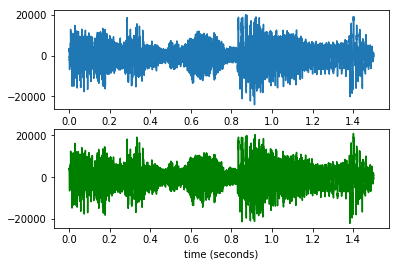

In [6]:
%matplotlib inline
from IPython import display
display.clear_output(wait=True)
# 绘制波形
plt.subplot(2, 1, 1)  # 这里也可以使用pl.subplot(211)
plt.plot(time, wave_data[0][0:len(time)])
plt.subplot(2, 1, 2)  # 这里也可以使用pl.subplot(212)

plt.plot(time, wave_data[1][0:len(time)], c="g")
plt.xlabel("time (seconds)")
plt.show()